<a href="https://colab.research.google.com/github/outliers8224/OR/blob/main/OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Interior and Exterior Paints (ProductMix)
==
Reddy Mikks produces both interior and exterior paints from two raw materials,
M1 & M2. The following table provides the basic data of the problem:
  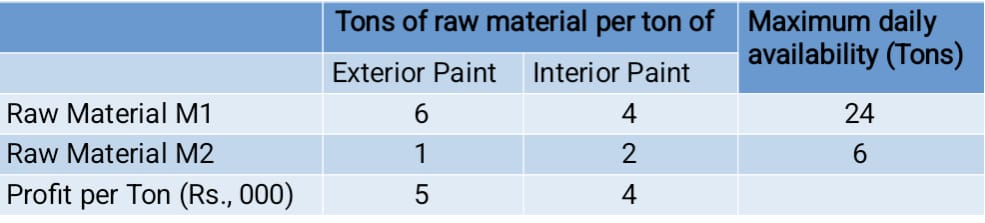  


A market survey indicates that the daily demand for interior paint cannot exceed
that of exterior paint by more than 1 ton. Also, the maximum daily demand of
interior paint is 2 tons. Reddy Mikks wants to determine the optimum (best)
product mix of interior and exterior paints that maximizes the total daily profit.

Decision Variables:
==
X1 = Daily Production of Exterior Paint (Ton)

X2 = Daily Production of Interior Paint (Ton)

Objective Function:
==

    Maximize Z= 5X1 + 4X2

Constraints:
====
Raw Material M1:

    6X1 + 4X2 ≤ 24

Raw Material M2:

    X1 + 2X2 ≤ 6

Market Demand:

    -X1 + X2 ≤ 1

Market Demand:

    X2 ≤ 2

Non-Negativity Conditions:

    X1, X2 ≥ 0

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 52.6 MB/s eta 0:00:00


In [ ]:
from pulp import *
import pulp

In [ ]:
model = LpProblem("PaintMix", LpMaximize)

In [ ]:
x1 = LpVariable("Exterior Paint", 0, None, LpInteger)
x2 = LpVariable("Interior Paint", 0, None, LpInteger)
X1 = LpVariable("Exterior Paint (Float)", x1.lowBound, x1.upBound, 'Continuous')
X2 = LpVariable("Exterior Paint (Float)", x2.lowBound, x2.upBound, 'Continuous')

In [ ]:
#objective function
model += 5 * X1 + 4 * X2

In [ ]:
#constrants
model += 6*X1 + 4*X2 <= 24  #Raw Material M1
model += 1*X1 + 2*X2 <= 6   #Raw Material M2
model += 1*X2 - 1*X1 <= 1   #Market Demand
model += 1*X2 <= 2          #Market Demandm
model += X1 >= 0
model += X2 >= 0


In [ ]:
model.solve()
print("Optimal Solution:")
for v in model.variables():
  print(v.name, "=", v.varValue,"tons")

print("Maximum Profit:", value(model.objective)*1000,"Rs")

Optimal Solution:
Exterior_Paint = 4.0 tons
Interior_Paint = 0.0 tons
Maximum Profit: 20000.0 Rs
